<a href="https://colab.research.google.com/github/DmitriiGoro/ML_2024_3_term/blob/master/LabWorks/lab01_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-11-17 10:40:53--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.2’

car_data.csv.2      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2024-11-17 10:40:53 (5.05 MB/s) - ‘car_data.csv.2’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [ ]:
pd.DataFrame(dataset)[0].value_counts()

,count
0,
0,1
581,1
557,1
558,1
559,1
...,...
285,1
286,1
287,1


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

X_train_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,64,93,45,86,201,69,7,184,35,22,145,203,523,183,72,0,4,194,197
1,805,81,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
2,30,89,43,85,160,64,11,155,43,19,151,173,356,174,72,5,9,185,196
3,227,94,35,66,147,62,9,131,50,18,127,159,258,115,66,8,7,196,201
4,574,104,55,105,216,68,11,205,32,23,169,221,623,216,71,9,18,189,196
5,67,98,55,101,219,69,11,225,30,25,178,231,748,216,74,6,14,187,195
6,629,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204
7,429,84,37,70,145,62,9,136,48,18,134,159,280,140,68,11,9,194,202
8,438,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198
9,279,94,37,73,186,71,7,154,42,19,127,171,362,132,67,2,8,197,206


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.000000,93.799636,44.908925,82.264117,168.692168,61.690346,8.637523,169.076503,40.890710,20.601093,148.222222,188.877960,441.247723,175.051002,72.526412,6.524590,12.579235,188.921676,195.673953
std,246.552433,8.364415,6.193864,15.603943,33.205096,7.858623,4.595870,33.601105,7.726795,2.631102,14.422261,31.764841,179.897600,32.769227,7.488296,4.955075,8.594240,6.097689,7.432499
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,199.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,150.000000,68.000000,2.000000,6.000000,185.000000,191.000000
50%,428.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,633.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,589.000000,198.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,36.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE

dataset_pd = pd.DataFrame(dataset)
dataset_pd.info()

dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       846 non-null    object
 1   1       846 non-null    object
 2   2       846 non-null    object
 3   3       846 non-null    object
 4   4       846 non-null    object
 5   5       846 non-null    object
 6   6       846 non-null    object
 7   7       846 non-null    object
 8   8       846 non-null    object
 9   9       846 non-null    object
 10  10      846 non-null    object
 11  11      846 non-null    object
 12  12      846 non-null    object
 13  13      846 non-null    object
 14  14      846 non-null    object
 15  15      846 non-null    object
 16  16      846 non-null    object
 17  17      846 non-null    object
 18  18      846 non-null    object
 19  19      846 non-null    object
dtypes: object(20)
memory usage: 132.3+ KB


array([[0, 95, 48, ..., 187, 197, 'van'],
       [1, 91, 41, ..., 189, 199, 'van'],
       [2, 104, 50, ..., 188, 196, 'saab'],
       ...,
       [843, 106, 54, ..., 187, 201, 'saab'],
       [844, 86, 36, ..., 190, 195, 'saab'],
       [845, 85, 36, ..., 186, 190, 'van']], dtype=object)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
dataset_pd = pd.DataFrame(dataset)

In [ ]:
dataset_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

In [ ]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.550568,-0.432665,-0.942856,0.450229,0.341612,0.037728,-0.094984,0.202600,-0.378340,0.179159,-1.061891,0.385788,0.120514,-0.624522,-0.313164,1.011902,0.248237,0.007501,-0.074573
1,-1.276713,-0.683156,-1.595984,-1.976483,-1.425449,-0.465883,-0.745990,-1.670110,2.258202,-1.409207,-1.743208,-1.829560,-1.438748,-1.122630,0.221375,3.078856,-0.907021,-1.106382,-1.148428
2,1.761819,1.571258,1.506371,1.196910,1.549104,0.667243,0.773023,1.645508,-1.382737,1.767525,1.731508,1.297990,1.662190,0.807539,-0.313164,-0.641660,-0.907021,-0.310751,0.730818
3,1.320608,1.446013,1.016526,0.699123,-0.276859,-1.347204,-0.311986,1.492007,-1.382737,1.370434,1.186455,1.688934,1.556676,1.056592,1.156818,0.598512,1.298472,-0.151625,-1.014196
4,-0.748092,-0.557911,-1.432702,-0.296451,0.076553,0.037728,-0.094984,-0.350003,0.123859,-0.615024,-1.538813,-0.461257,-0.412918,-1.496210,-1.248608,-0.228270,0.983402,1.439636,1.267746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.293363,0.694542,0.526680,-0.172005,0.871730,0.793146,-0.528988,0.509602,-0.754989,0.576251,0.368875,0.450945,0.507399,-0.095282,0.221375,-0.228270,-0.486927,0.962258,-0.074573
293,1.707708,0.444051,-1.269420,-0.732015,0.106004,0.541340,-0.311986,-0.534204,0.249408,-0.615024,-1.266286,-0.689307,-0.536017,-1.714133,-0.981338,-1.261746,0.353261,1.917014,1.670441
294,-0.656520,-0.557911,-0.779575,-1.354249,-1.130939,-0.717689,-0.528988,-1.547309,1.881553,-1.409207,-0.721232,-1.471194,-1.339096,-0.655653,-0.981338,0.805207,-0.486927,0.644005,0.462354
295,-0.652357,-0.557911,-1.595984,-0.732015,-0.924782,-0.465883,-0.311986,-1.301708,1.504904,-1.409207,-1.334417,-1.340880,-1.174963,-1.932055,-1.114973,-0.434965,0.668331,1.598762,1.536209


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


def grid_search_cv(X_train):
    model = LogisticRegression(max_iter = 500, multi_class = 'multinomial',solver = 'saga', tol = 1e-3)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
    cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    with ignore_warnings(category=FutureWarning):
      with ignore_warnings(category=ConvergenceWarning):
        grid_result = grid_search.fit(X_train, y_train)

    res = (grid_search.best_params_, grid_result.best_score_)
    print("Best parameters", grid_search.best_params_)
    print("Best cross-validation score", grid_result.best_score_)

    return res

In [ ]:
from sklearn.utils._testing import ignore_warnings

grid_search_cv(X_train_scaled)

Best parameters {'C': 10, 'penalty': 'l1'}
Best cross-validation score 0.8018181818181818


({'C': 10, 'penalty': 'l1'}, 0.8018181818181818)

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead
!pip install scipy==1.9.3
!pip install scikit-plot

In [ ]:
import scikitplot as skplt


In [ ]:
def roc_plot(X_train, X_test, penalty, C):
    model = LogisticRegression(max_iter=500, multi_class='multinomial',solver='saga', tol=1e-3, C = C, penalty=penalty)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

    y_pred = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_pred)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy:  0.7710437710437711
   f1:     0.7624780861719993


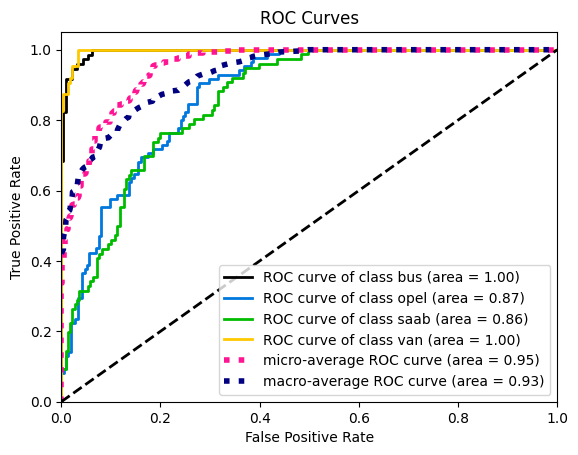

In [ ]:
roc_plot(X_train_scaled, X_test_scaled, 'l1', 10)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


pca=PCA(X_train.shape[1])
pca.fit(X_train_scaled)
pca.explained_variance_ratio_

array([4.95726032e-01, 1.61451930e-01, 9.90875451e-02, 6.24271112e-02,
       5.16806561e-02, 4.80533001e-02, 2.73574982e-02, 1.96637253e-02,
       1.09062713e-02, 8.48612969e-03, 4.55070177e-03, 3.55350090e-03,
       2.16777700e-03, 1.91021376e-03, 1.13707903e-03, 8.51489571e-04,
       6.61312022e-04, 3.09137890e-04, 1.85893729e-05])

Text(0, 0.5, 'Explained Variance')

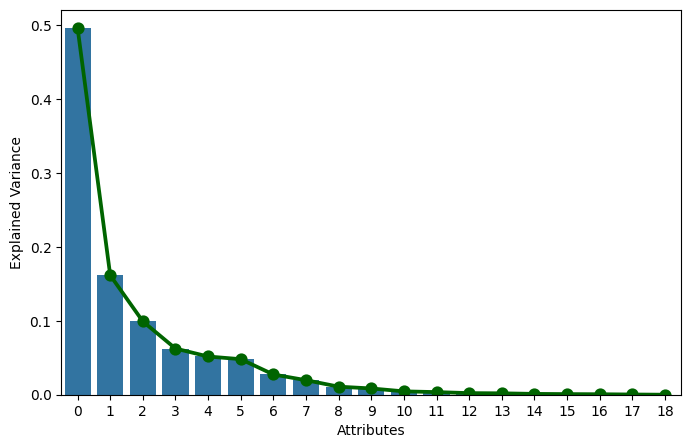

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(pca.explained_variance_ratio_,ax=axes)
plot = sns.pointplot(pca.explained_variance_ratio_,ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
for i,x in enumerate(pca.explained_variance_ratio_.cumsum()):
    if x>0.99:
        print("необходимо размерностей: {}".format(i+1))
        n_comp = i + 1
        break

необходимо размерностей: 12


In [ ]:
pca = PCA(n_components=12)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca.shape

(549, 12)

Количество признаков может быть уменьшено до 12, так как это количество компонент обеспечивает 99% информативности.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
result = grid_search_cv(X_train_pca)

Best parameters {'C': 1, 'penalty': 'l1'}
Best cross-validation score 0.7727272727272727


In [ ]:
penalty_pca = result[0]['penalty']
C_pca = result[0]['C']

print(penalty_pca, C_pca)

l1 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy:  0.6868686868686869
   f1:     0.6736183590102106


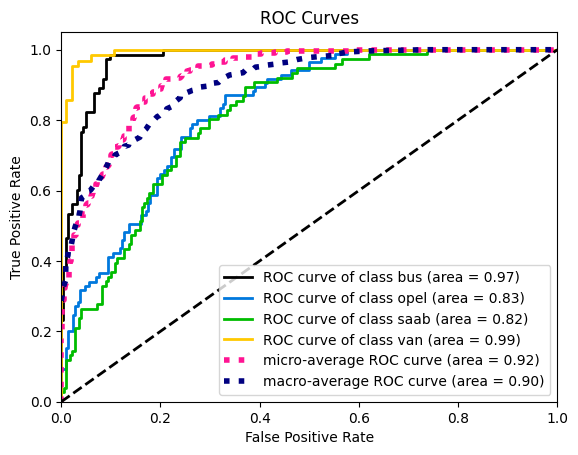

In [ ]:
roc_plot(X_train_pca, X_test_pca, penalty_pca, C_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# YOUR CODE HERE
def random_search_tree(X_train):
    model = DecisionTreeClassifier()
    param_dist = {'max_depth': range(1, 100)}
    cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
    random_search = RandomizedSearchCV(model, param_dist, cv=cv, n_iter = 20)
    random_result = random_search.fit(X_train, y_train)

    res = (random_search.best_params_, {'cross validation score': random_result.best_score_})
    return res

In [ ]:
random_search_tree(X_train_pca)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


({'max_depth': 51}, {'cross validation score': 0.6372727272727272})

In [ ]:
max_depth = random_search_tree(X_train_pca)[0]['max_depth']


In [ ]:
def roc_plot_tree(X_train, X_test):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

    y_pred = model.predict_proba(X_test) # gives the probability for each class to be positively (correctly) classified
    skplt.metrics.plot_roc(y_test, y_pred)
    plt.show()

accuracy:  0.5824915824915825
   f1:     0.5754455321510279


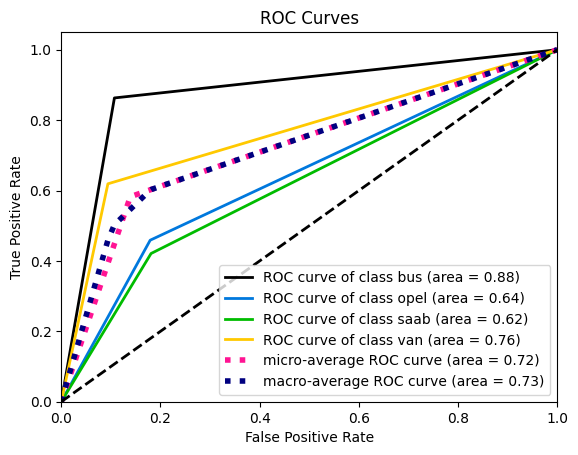

In [ ]:
roc_plot_tree(X_train_pca, X_test_pca)


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

N_min = 2
N_max = 100
step = 5

In [ ]:
def bagging_logreg(X_train, X_test, C, N_min, N_max, step):
    lr_accuracy = []
    lr_f1 = []

    for n in np.arange(2, 100, 5):
        bagging_lr = BaggingClassifier(
            estimator=LogisticRegression(max_iter=500,
                                         multi_class='multinomial',
                                         solver='saga',
                                         tol=1e-3,
                                         C = C,
                                         random_state = 42),
            n_estimators=n, random_state = 42)

        with ignore_warnings(category=FutureWarning):
          with ignore_warnings(category=ConvergenceWarning):
            bagging_lr.fit(X_train, y_train)

        y_lr_pred = bagging_lr.predict(X_test)

        f1 = f1_score(y_test, y_lr_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_lr_pred)

        lr_accuracy.append(accuracy)
        lr_f1.append(f1)
    plt.figure(figsize=(12, 6))
    plt.plot(range(N_min, N_max, step), lr_f1, label='F1 Score', marker='o')
    plt.plot(range(N_min, N_max, step), lr_accuracy, label='Accuracy', marker='o')
    plt.xlabel('Размер ансамбля')
    plt.ylabel('Score')
    plt.title('F1, Accuracy. Бэггинг. Логистическая регрессия')
    plt.legend()
    plt.grid(True)
    plt.show()

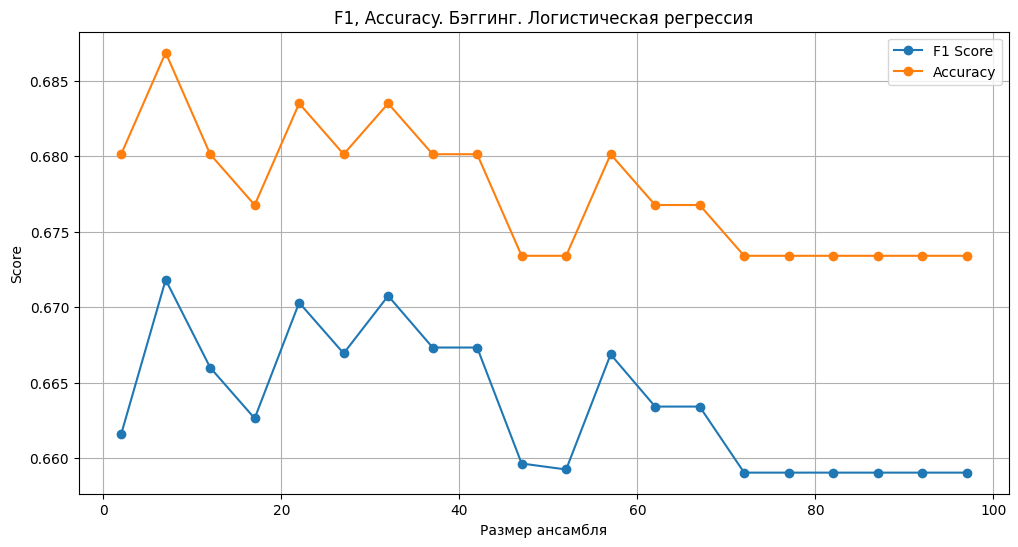

In [ ]:
bagging_logreg(X_train_pca, X_test_pca, C_pca, N_min, N_max, step)

In [ ]:
def bagging_decision_tree(X_train, X_test, max_depth, N_min, N_max, step):
    f1_scores = []
    accuracy_scores = []

    for n_estimators in range(N_min, N_max, step):
        bagging_clf = BaggingClassifier(
            estimator=DecisionTreeClassifier(max_depth = max_depth, criterion='entropy'),
                        n_estimators=n_estimators, random_state=42)

        bagging_clf.fit(X_train, y_train)

        y_pred = bagging_clf.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

    plt.figure(figsize=(12, 6))
    plt.plot(range(N_min, N_max, step), f1_scores, label='F1 Score', marker='o')
    plt.plot(range(N_min, N_max, step), accuracy_scores, label='Accuracy', marker='o')
    plt.xlabel('Размер ансамбля')
    plt.ylabel('Score')
    plt.title('F1, Accuracy. Бэггинг. Дерево решений')
    plt.legend()
    plt.grid(True)
    plt.show()

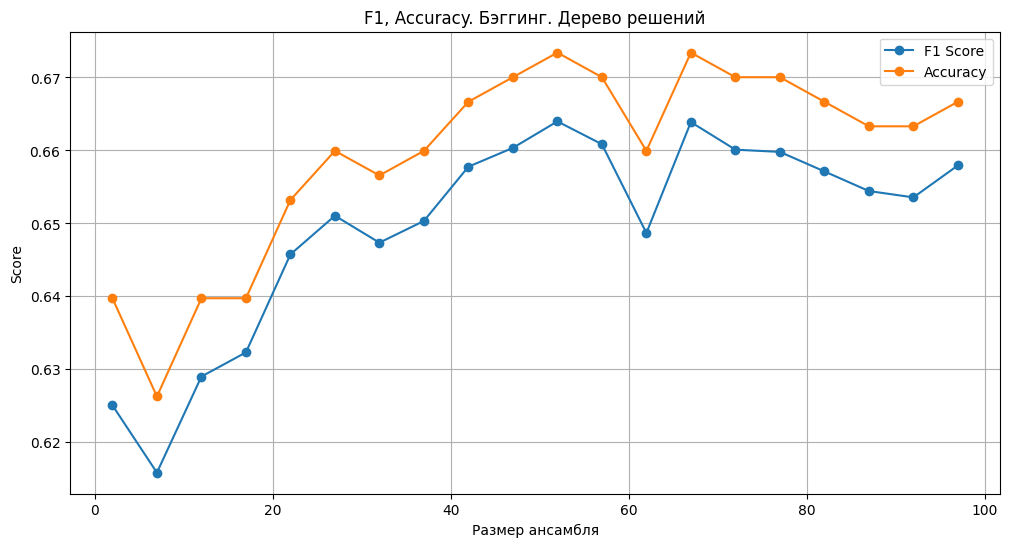

In [ ]:
bagging_decision_tree(X_train_pca, X_test_pca, max_depth, N_min, N_max, step)

**Оптимальный размер ансамбля для логистической регрессии: 80-85**

**Оптимальный размер ансамбля для дерева решений: 40-45**


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [ ]:
def random_forest(X_train, X_test, N_min, N_max, step):

    accuracy = []
    f1_scores = []
    ensemble_sizes = np.arange(N_min, N_max, step)

    for n_estimators in ensemble_sizes:
        rand_forest_clf = RandomForestClassifier(n_estimators = n_estimators, random_state=42, n_jobs=-1)
        rand_forest_clf.fit(X_train, y_train)
        y_pred = rand_forest_clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    plt.figure(figsize=(12, 6))
    plt.plot(ensemble_sizes, f1_scores, label='F1 Score', marker='o')
    plt.plot(ensemble_sizes, accuracy, label='Accuracy', marker='o')
    plt.xlabel('Размер ансамбля')
    plt.ylabel('Score')
    plt.title('F1 Score, Accuracy. Случайный лес')
    plt.legend()
    plt.grid(True)
    plt.show()

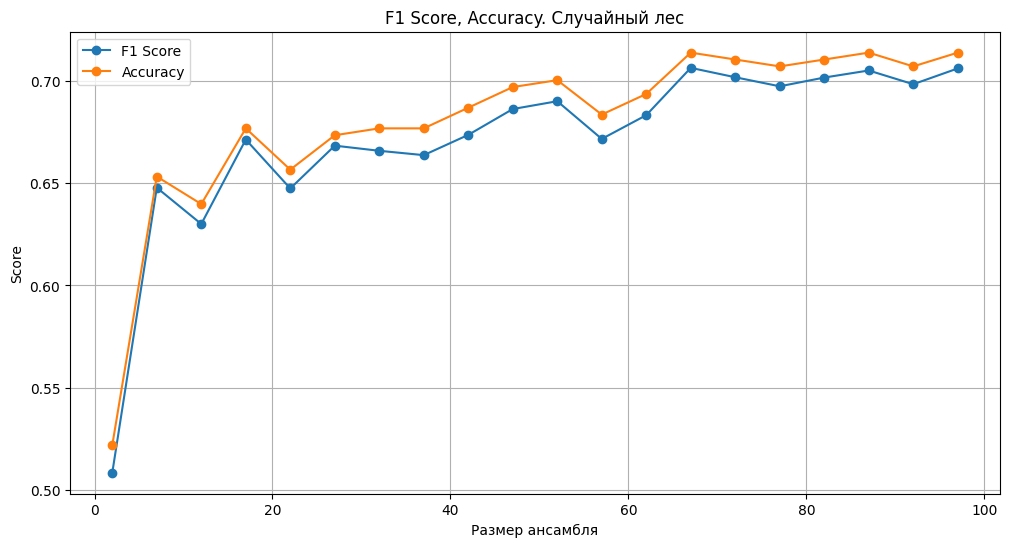

In [ ]:
random_forest(X_train_pca, X_test_pca, N_min, N_max, step)

Оптимальное количество деревьев около 20-25. Отличие может быть вызвано тем, что в Random Forest каждое дерево строится на случайной подвыборке как наблюдений, так и признаков. Это приводит к большему разнообразию деревьев. В Bagging же используется полная выборка признаков, что приводит к меньшему разнообразию. В результате для Random Forest может потребоваться больше деревьев, чтобы достичь оптимального уровня производительности.


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [ ]:
def learning_curve(X_train, X_test):
    dataset_size = []

    lr_acc = []
    dt_acc = []
    rf_acc = []

    lr_f1 = []
    dt_f1 = []
    rf_f1 = []

    lr = LogisticRegression(max_iter=85,
                                 multi_class='multinomial',
                                 solver='saga', tol=1e-3,
                                 penalty = penalty_pca,
                                 C = C_pca,
                                 random_state = 42)

    dt = DecisionTreeClassifier(max_depth = max_depth, criterion='entropy')

    rf = RandomForestClassifier(n_estimators = 25, random_state=42, n_jobs=-1)
    parts = 10

    X_parts = np.array_split(X_train, parts)
    y_parts = np.array_split(y_train, parts)

    X_united_parts = []
    y_united_parts = []

    for i in range(1, parts + 1):
        X_united_parts = np.concatenate(X_parts[:i], axis = 0)
        y_united_parts = np.concatenate(y_parts[:i], axis = 0)

        #Logistic Regression
        lr.fit(X_united_parts, y_united_parts)
        lr_y_pred = lr.predict(X_test)
        lr_acc.append(accuracy_score(y_test, lr_y_pred))
        lr_f1.append(f1_score(y_test, lr_y_pred, average='weighted'))

        # Decision Tree
        dt.fit(X_united_parts, y_united_parts)
        dt_y_pred = dt.predict(X_test_pca)
        dt_acc.append(accuracy_score(y_test, dt_y_pred))
        dt_f1.append(f1_score(y_test, dt_y_pred, average='weighted'))

        # Random Forest
        rf.fit(X_united_parts, y_united_parts)
        rf_y_pred = rf.predict(X_test_pca)
        rf_acc.append(accuracy_score(y_test, rf_y_pred))
        rf_f1.append(f1_score(y_test, rf_y_pred, average='weighted'))

        dataset_size.append(X_united_parts.shape[0])


    plt.figure(figsize=(12, 6))
    plt.plot(dataset_size, lr_f1, label='F1 Score Логистическая регрессия')
    plt.plot(dataset_size, lr_acc, label='Accuracy Логистическая регрессия')

    plt.plot(dataset_size, dt_f1, label='F1 Score Дерево решений')
    plt.plot(dataset_size, dt_acc, label='Accuracy Дерево решений')

    plt.plot(dataset_size, rf_f1, label='F1 Score Случайный лес')
    plt.plot(dataset_size, rf_acc, label='Accuracy Случайный лес')

    plt.xlabel('Размер тренировочной выборки')
    plt.ylabel('Score')
    plt.title('Accuracy и F1-score для различных датасетов')
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: 

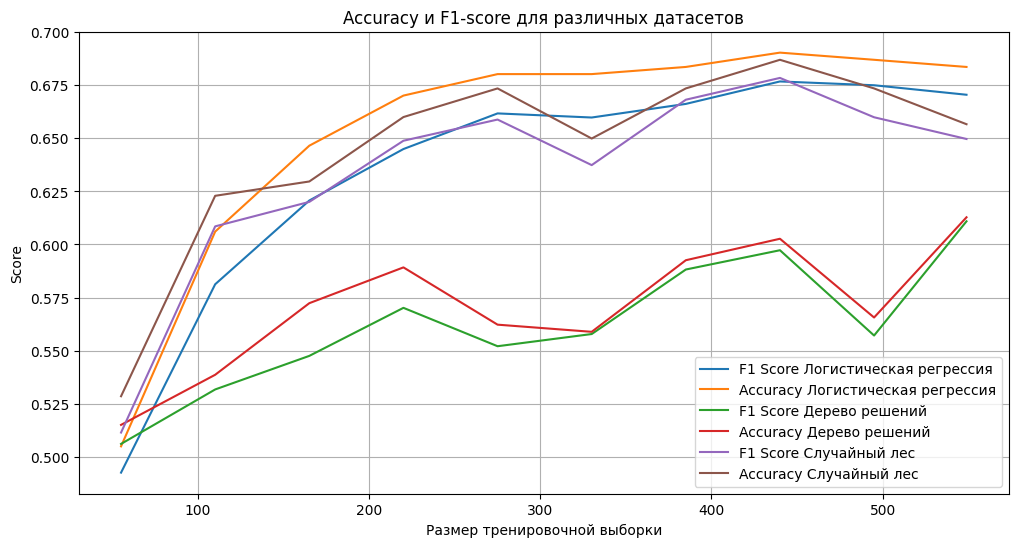

In [ ]:
learning_curve(X_train_pca, X_test_pca)

Согласно полученному графику, дерево решений показывает самые низкие результаты. В то же время, для логистической регрессии и случайного леса оптимальный размер тренировочной выборки 420-430. Также можно заметить, что дальнейшее увеличение размера выборки ухудшает точность, а, начиная с размера 270-280, увеличение размерности выборки не приносит больших улучшений.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
!pip install catboost
from catboost import CatBoost, Pool, CatBoostClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
def catboost_ens():
  model = CatBoostClassifier(
      iterations=5,
      loss_function='MultiClass',
      eval_metric='Accuracy',
      logging_level='Silent')

  param_grid = {
        'iterations': [100, 200, 300, 350, 400, 450, 500],
        'depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1, 0.15]
    }
  cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
  grid_search = GridSearchCV(model, param_grid, cv=cv)

  grid_result = grid_search.fit(X_train, y_train)
  res = (grid_search.best_params_, grid_result.best_score_)
  print("Best parameters", grid_search.best_params_)
  print("Best cross-validation score", grid_result.best_score_)

In [ ]:
catboost_ens()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters {'depth': 3, 'iterations': 400, 'learning_rate': 0.15}
Best cross-validation score 0.7690909090909092


In [ ]:
def catboost_ens_2():
  model = CatBoostClassifier(
      iterations=5,
      loss_function='MultiClass',
      eval_metric='Accuracy',
      logging_level='Silent')

  param_grid = {
        'iterations': [350, 400, 500, 800, 1000],
        'depth': [10, 15, 3],
        'learning_rate': [0.01, 0.05, 0.1]
    }
  cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
  grid_search = GridSearchCV(model, param_grid, cv=cv)

  grid_result = grid_search.fit(X_train, y_train)
  res = (grid_search.best_params_, grid_result.best_score_)
  print("Best parameters", grid_search.best_params_)
  print("Best cross-validation score", grid_result.best_score_)

In [ ]:
catboost_ens_2()